### Multivariable functions, partial derivatives and plots

In [281]:
%run core.ipynb

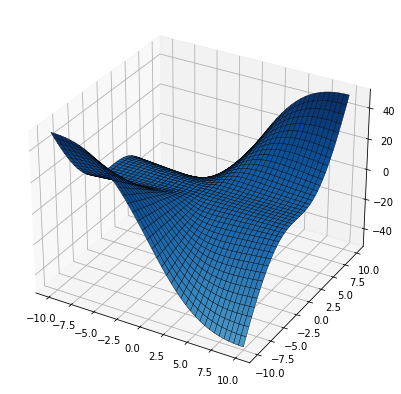

In [307]:
def truncate_cmap(cmap, minval=0.0, maxval=1.0, n=256):
    new_cmap = plot_colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def plot_mapping(f, a=-1.0, b=1.0, s=0.05, size=(9, 7), filepath=None):
    X, Y = meshgrid(np.arange(a, b, s), np.arange(a, b, s))
    Z = f(X, Y)
    fig = plot.figure()
    fig.set_size_inches(*size)
    ax = fig.gca(projection='3d')
    ax.plot_surface(X,
                    Y,
                    Z,
#                     cstride=1,
#                     rstride=1,
                    cmap=truncate_cmap(plot_cmap.Blues, 0.6, 1.0),
                    linewidth=0.4,
                    edgecolors="black",
                    antialiased=True
    )
    plot.show()
    if filepath is not None:
        fig.savefig(filepath, dpi=fig.dpi)

        
def f(x, y):
    return x * y ** 3 / (x ** 2 + y ** 2)


a, b, s = -10.0001, 10.0, 0.1  # ommitting the origin (0, 0)
plot_mapping(f, a=a, b=b, s=s)

In [283]:
def f(x, y):
    return x * y * (x**2 - y**2) / (x**2 + y**2)


u = f(x, y)

#### Multivariable mapping

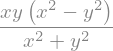

In [284]:
f(x, y)

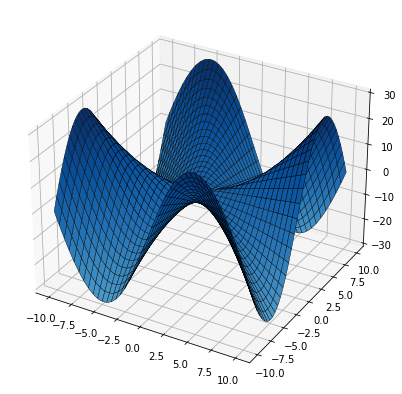

In [285]:
a, b, s = -10.0001, 10.0, 0.1  # ommitting the origin (0, 0)
plot_mapping(f, a=a, b=b, s=s)

#### Partial derivatives

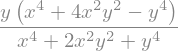

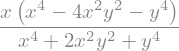

In [286]:
simplify(u.diff(x))
simplify(u.diff(y))

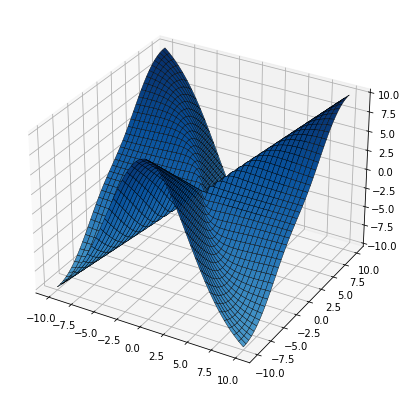

In [287]:
plot_mapping(lambdify((x, y), u.diff(x), modules='numpy'), a=a, b=b, s=s)

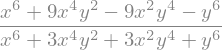

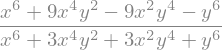

In [288]:
simplify(u.diff(x).diff(y))
simplify(u.diff(y).diff(x))

#### Mixed partial derivatives

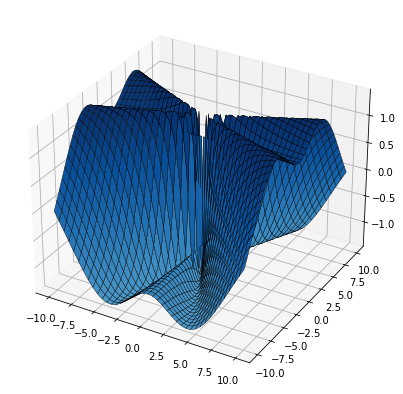

In [289]:
plot_mapping(lambdify((x, y), u.diff(y).diff(x), modules='numpy'),
             a=a,
             b=b,
             s=s)

### Example

In [290]:
def f(x, y):
    return x * y ** 3 / (x ** 2 + y ** 2)

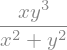

In [291]:
f(x, y)

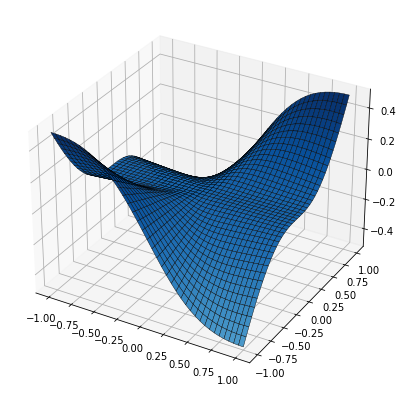

In [292]:
a, b, s = -1.0001, 1.0, 0.05
filepath = f"plots/non_interchangeable_partial_derivatives.png"
plot_mapping(f, a=a, b=b, s=s, filepath=filepath)

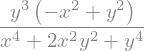

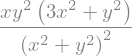

In [293]:
simplify(f(x, y).diff(x))
simplify(f(x, y).diff(y))

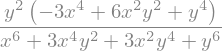

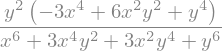

In [294]:
simplify(f(x, y).diff(x).diff(y))
simplify(f(x, y).diff(y).diff(x))

In [295]:
_tex(simplify(f(x, y).diff(x).diff(y)))
_tex(simplify(f(x, y).diff(y).diff(x)))

\frac{y^{2} \left(- 3 x^{4} + 6 x^{2} y^{2} + y^{4}\right)}{x^{6} + 3 x^{4} y^{2} + 3 x^{2} y^{4} + y^{6}}
\frac{y^{2} \left(- 3 x^{4} + 6 x^{2} y^{2} + y^{4}\right)}{x^{6} + 3 x^{4} y^{2} + 3 x^{2} y^{4} + y^{6}}


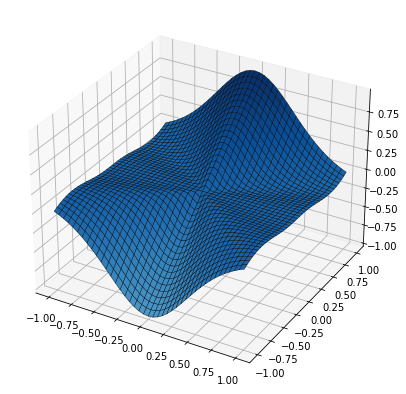

In [296]:
plot_mapping(lambdify((x, y), f(x, y).diff(x), modules='numpy'), a=a, b=b, s=s)

In [297]:
def f(x, y):
    return y ** 3 / (x ** 2 + y ** 2)

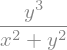

In [298]:
f(x, y)

In [299]:
_tex(f(x,y))

\frac{y^{3}}{x^{2} + y^{2}}


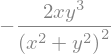

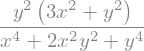

In [300]:
simplify(f(x, y).diff(x))
simplify(f(x, y).diff(y))

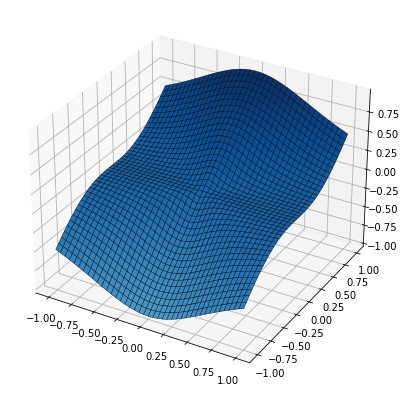

In [301]:
filepath = f"plots/partial_derivatives_but_not_differentiable.png"
plot_mapping(f, a=a, b=b, s=s, filepath=filepath)